In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

sns.set(style='whitegrid')

In [2]:
df_sales = pd.read_csv('source/sales.csv', parse_dates=['DATE_ORDER'])
df_comp = pd.read_csv('source/comp_prices.csv', parse_dates=['DATE_EXTRACTION'])

In [3]:
print(f'Total Sales: {df_sales.shape[0]}')
print(f'Total Competitor Price: {df_comp.shape[0]}')

Total Sales: 351091
Total Competitor Price: 50114


In [4]:
df_sales['YEAR'] = df_sales['DATE_ORDER'].dt.year
df_sales['MONTH'] = df_sales['DATE_ORDER'].dt.month
df_sales['DAY'] = df_sales['DATE_ORDER'].dt.day
df_sales['WEEKDAY'] = df_sales['DATE_ORDER'].dt.weekday

df_comp['YEAR'] = df_comp['DATE_EXTRACTION'].dt.year
df_comp['MONTH'] = df_comp['DATE_EXTRACTION'].dt.month
df_comp['DAY'] = df_comp['DATE_EXTRACTION'].dt.day
df_comp['WEEKDAY'] = df_comp['DATE_EXTRACTION'].dt.weekday

In [5]:
df_sales['VL_UNIT'] = round(df_sales['REVENUE'] / df_sales['QTY_ORDER'], 2)

In [6]:
df_sales.set_index('DATE_ORDER', inplace=True)
df_comp.set_index('DATE_EXTRACTION', inplace=True)

In [7]:
df_sales.head()

,PROD_ID,QTY_ORDER,REVENUE,YEAR,MONTH,DAY,WEEKDAY,VL_UNIT
DATE_ORDER,,,,,,,,
2015-08-02,P6,1.0,1808.99,2015,8,2,6,1808.99
2015-08-17,P6,1.0,1674.00,2015,8,17,0,1674.00
2015-08-17,P6,1.0,1673.95,2015,8,17,0,1673.95
2015-08-11,P6,1.0,1674.00,2015,8,11,1,1674.00
2015-08-17,P6,1.0,1674.00,2015,8,17,0,1674.00


In [8]:
df_comp.head()

,PROD_ID,COMPETITOR,COMPETITOR_PRICE,PAY_TYPE,YEAR,MONTH,DAY,WEEKDAY
DATE_EXTRACTION,,,,,,,,
2015-01-30 08:11:38,P6,C3,1898.00,1,2015,1,30,4
2015-01-30 08:11:38,P6,C1,1898.00,1,2015,1,30,4
2015-01-30 08:11:38,P6,C6,1999.90,1,2015,1,30,4
2015-01-31 20:10:14,P6,C2,1894.88,2,2015,1,31,5
2015-01-31 20:10:14,P6,C3,1894.88,2,2015,1,31,5


In [9]:
df_sales.dtypes

PROD_ID       object
QTY_ORDER    float64
REVENUE      float64
YEAR           int64
MONTH          int64
DAY            int64
WEEKDAY        int64
VL_UNIT      float64
dtype: object

In [10]:
df_comp.dtypes

PROD_ID              object
COMPETITOR           object
COMPETITOR_PRICE    float64
PAY_TYPE              int64
YEAR                  int64
MONTH                 int64
DAY                   int64
WEEKDAY               int64
dtype: object

In [11]:
df_sales.describe()

,QTY_ORDER,REVENUE,YEAR,MONTH,DAY,WEEKDAY,VL_UNIT
count,351091.000000,351091.000000,351091.0,351091.000000,351091.000000,351091.000000,351091.000000
mean,1.078837,764.953615,2015.0,5.968669,15.420167,2.655015,712.347413
std,1.103650,781.957331,0.0,2.638461,8.946808,1.734857,197.892699
min,1.000000,229.000000,2015.0,1.000000,1.000000,0.000000,229.000000
25%,1.000000,649.000000,2015.0,4.000000,7.000000,1.000000,649.000000
50%,1.000000,749.000000,2015.0,6.000000,16.000000,2.000000,749.000000
75%,1.000000,799.000000,2015.0,8.000000,23.000000,4.000000,794.320000
max,500.000000,368750.000000,2015.0,10.000000,31.000000,6.000000,2599.000000


In [12]:
df_comp.describe()

,COMPETITOR_PRICE,PAY_TYPE,YEAR,MONTH,DAY,WEEKDAY
count,50114.000000,50114.000000,50114.0,50114.000000,50114.000000,50114.000000
mean,1111.281449,1.499701,2015.0,6.106018,15.486411,2.927026
std,3805.613500,0.500005,0.0,2.440813,8.767202,1.979078
min,359.100000,1.000000,2015.0,1.000000,1.000000,0.000000
25%,549.000000,1.000000,2015.0,4.000000,8.000000,1.000000
50%,799.000000,1.000000,2015.0,6.000000,15.000000,3.000000
75%,1359.000000,2.000000,2015.0,8.000000,23.000000,5.000000
max,149900.000000,2.000000,2015.0,10.000000,31.000000,6.000000


In [13]:
df_sales['PROD_ID'].sort_values().unique()

array(['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9'], dtype=object)

In [14]:
df_comp['PROD_ID'].sort_values().unique()

array(['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9'], dtype=object)

In [15]:
df_sales.nunique()

PROD_ID         9
QTY_ORDER      39
REVENUE      3078
YEAR            1
MONTH          10
DAY            31
WEEKDAY         7
VL_UNIT      2058
dtype: int64

In [16]:
df_comp.nunique()

PROD_ID                9
COMPETITOR             6
COMPETITOR_PRICE    2013
PAY_TYPE               2
YEAR                   1
MONTH                 10
DAY                   31
WEEKDAY                7
dtype: int64

In [17]:
df_sales.isnull().sum()

PROD_ID      0
QTY_ORDER    0
REVENUE      0
YEAR         0
MONTH        0
DAY          0
WEEKDAY      0
VL_UNIT      0
dtype: int64

In [18]:
df_comp.isnull().sum()

PROD_ID             0
COMPETITOR          0
COMPETITOR_PRICE    0
PAY_TYPE            0
YEAR                0
MONTH               0
DAY                 0
WEEKDAY             0
dtype: int64

In [19]:
df_sales.skew()

QTY_ORDER    278.768158
REVENUE      304.089991
YEAR           0.000000
MONTH         -0.260743
DAY           -0.051926
WEEKDAY        0.304711
VL_UNIT        1.765345
dtype: float64

In [20]:
df_sales.kurtosis()

QTY_ORDER    119971.632957
REVENUE      139996.717825
YEAR              0.000000
MONTH            -1.051368
DAY              -1.185817
WEEKDAY          -0.813706
VL_UNIT           8.953788
dtype: float64

# Exploratory Data Analysis

### 1. Revenue

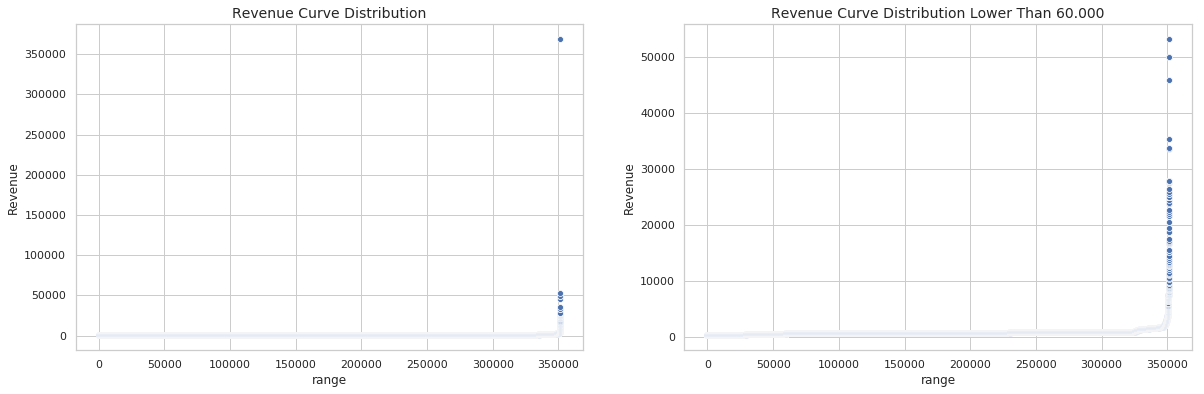

In [21]:
revenues = np.sort(df_sales.loc[df_sales['REVENUE'] < 60000, 'REVENUE'].values)

plt.figure(figsize=(20, 6))

plt.subplot(121)
sns.scatterplot(
    x=range(df_sales.shape[0]),
    y=np.sort(df_sales['REVENUE'].values)
)

plt.title('Revenue Curve Distribution', fontsize=14)
plt.xlabel('range')
plt.ylabel('Revenue')

plt.subplot(122)
sns.scatterplot(
    x=range(len(revenues)),
    y=revenues
)

plt.title('Revenue Curve Distribution Lower Than 60.000', fontsize=14)
plt.xlabel('range')
plt.ylabel('Revenue')

plt.show()

**Revenue Curve Distribution**
- *Podemos observar um valor totalmente fora do normal em comparação as outras receitas*
- *A distância entre um valor e o anterior tem um salto de aproximadamente 56 mil para 360 mil.*

**Revenue Curve Distribution Lower Than Max Value**
- *No segundo gráfico podemos visualizar uma curva mais uniforme, sem muitos valores distantes comparados aos demais.*

/home/leonardo/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


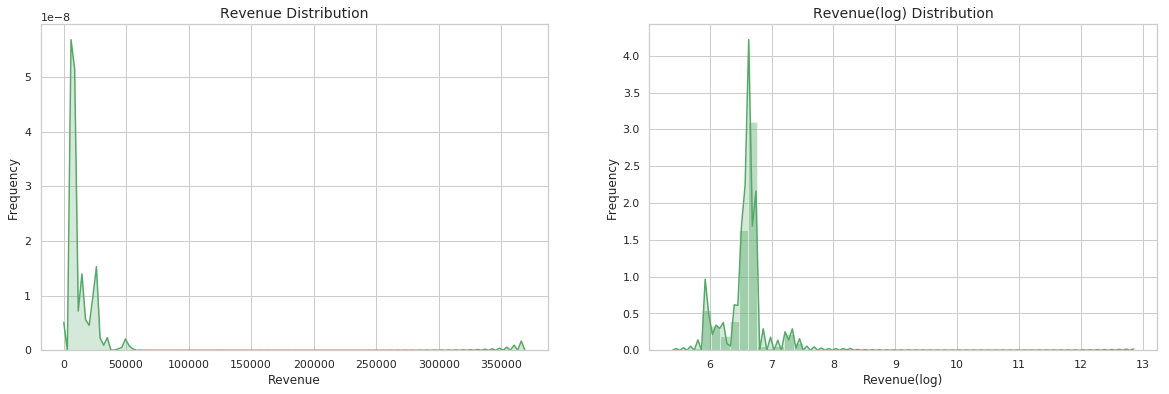

In [22]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
sns.distplot(
    df_sales['REVENUE'],
    color='g', 
    hist=False, 
    kde_kws={'shade': True}
)

plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.title('Revenue Distribution', fontsize=14)

plt.subplot(122)
sns.distplot(
    np.log(df_sales['REVENUE']),
    color='g', 
    hist=True, 
    kde_kws={'shade': True}
)

plt.xlabel('Revenue(log)')
plt.ylabel('Frequency')
plt.title('Revenue(log) Distribution', fontsize=14)

plt.show()

- Primeiro gráfico, skewness positivo. Enviesado para direita
- Utilização do log para a torno a distribuição menos enviesada.

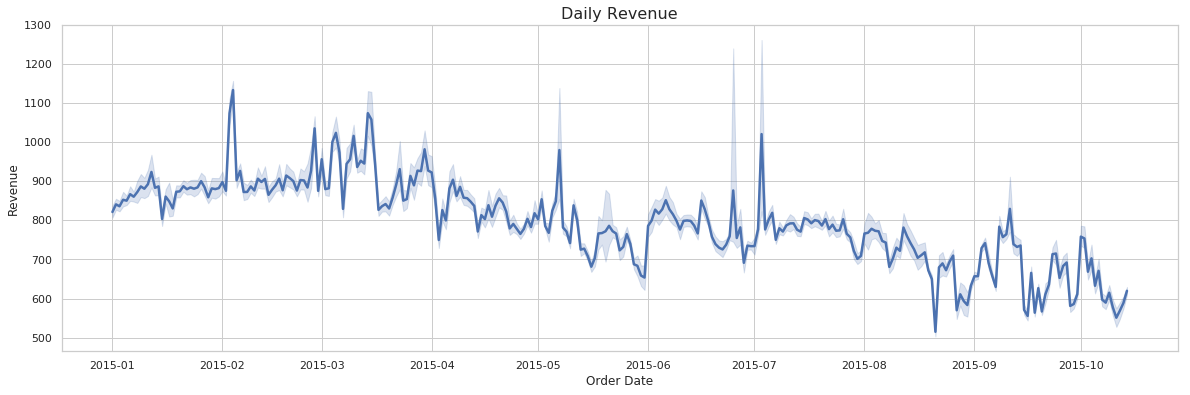

In [24]:
plt.figure(figsize=(20, 6))

sns.lineplot(
    x=df_sales.index, 
    y=df_sales['REVENUE'],
    palette='tab10', 
    linewidth=2.5
)

plt.ylabel('Revenue')
plt.xlabel('Order Date')
plt.title('Daily Revenue', fontsize=16)

plt.show()

**Média**
- Podemos reparar picos de vendas em determinados pontos do gráfico, muitos deles estão concentrados entre o meio do mês anterior até o início do mês seguinte. Talvez por questões de recebimento de salário possa ser um dos fatores para estes eventos.

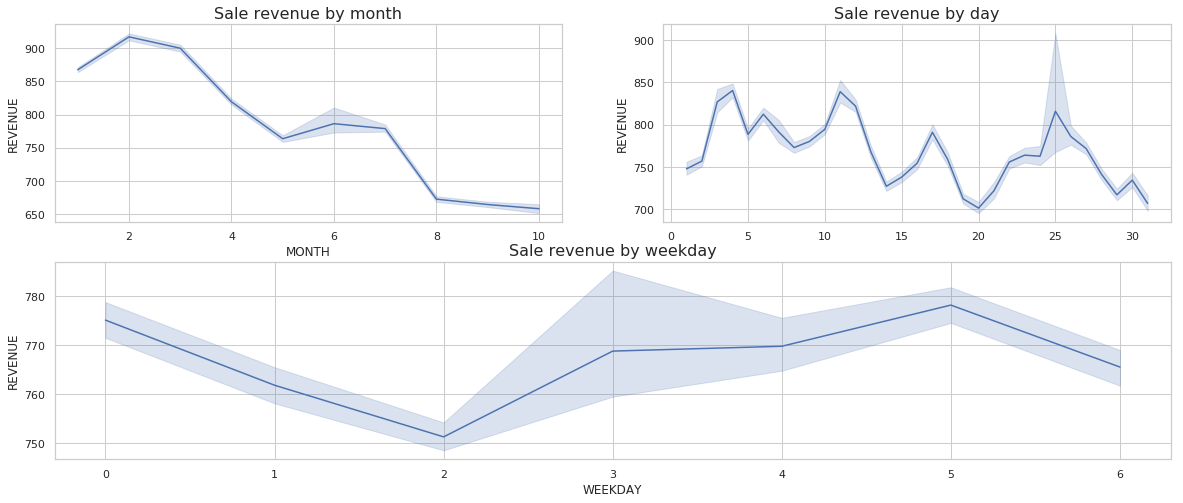

In [29]:
plt.figure(figsize=(20, 8))

plt.subplot(221)
sns.lineplot(x='MONTH', y=df_sales['REVENUE'], data=df_sales, palette='tab10')

plt.title('Sale revenue by month', fontsize=16)

plt.subplot(222)
sns.lineplot(
    x=(df_sales['DAY'].values),
#     y=round(df_sales['REVENUE'].sum(), 2), 
    y=df_sales['REVENUE'], 
    palette='tab10'
)

plt.title('Sale revenue by day', fontsize=16)

plt.subplot(212)
sns.lineplot(x='WEEKDAY', y='REVENUE', data=df_sales, palette='tab10')

plt.title('Sale revenue by weekday', fontsize=16)

plt.show()

*Comments*

### 2. Products

In [26]:
df_sales.PROD_ID.value_counts()

P7    195939
P2     63358
P8     27840
P5     19775
P9     18431
P4     14656
P6      4102
P1      4091
P3      2899
Name: PROD_ID, dtype: int64

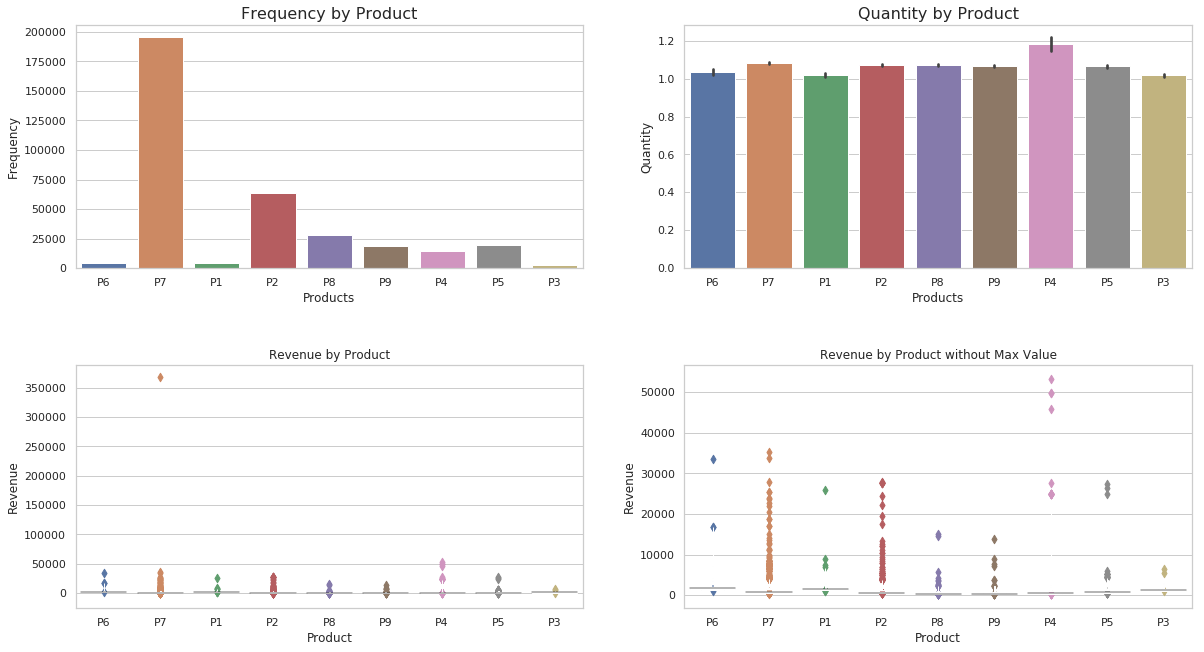

In [30]:
plt.figure(figsize=(20, 12))
plt.subplots_adjust(hspace=0.4, top=0.8)

plt.subplot(221)
sns.countplot(x='PROD_ID', data=df_sales)

plt.title('Frequency by Product', fontsize=16)
plt.xlabel('Products')
plt.ylabel('Frequency')

plt.subplot(222)
sns.barplot(x='PROD_ID', y='QTY_ORDER', data=df_sales)

plt.title('Quantity by Product', fontsize=16)
plt.xlabel('Products')
plt.ylabel('Quantity')

plt.subplot(223)
sns.boxenplot(x='PROD_ID', y='REVENUE', data=df_sales)

plt.title('Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Revenue')

plt.subplot(224)
sns.boxenplot(x='PROD_ID', y='REVENUE', data=df_sales[df_sales['REVENUE'] < df_sales['REVENUE'].max()])

plt.title('Revenue by Product without Max Value')
plt.xlabel('Product')
plt.ylabel('Revenue')

plt.show()

**Frequency by Product**
- Neste plot observamos que os produtos 7 e 2 possuem uma frequência maior em cada vendas no geral (não sendo considerado as suas respectivas quantidades vendidas).

**Quantity by Product**
- Neste gráfico analisamos a quantidade total vendida de cada produto em cada venda. Apesar dos produtos 7 e 2 terem mais frequências em cada venda realizada, os dados nos indicam que o produto 4 possui uma maior quantidade vendida. Mesmo que ele não tenha tanta frequência em muitas vendas, os clientes compram este produto em maior quantidade do que os outros produtos.

**Revenue by Product**
- Assim como no gráfico anterior o produto 7 continua tendo um destaque no valor da receita comparado aos outros produtos. Aqui visualizamos claramente que existe uma venda onde o valor do seu produto é muito superior aos outros, tornando assim essa diferença e a distância visualizada no gráfico.

**Revenue by Product without Max Value**
- Neste plot retiramos o valor da receita significativa do produto 7 para analisarmos melhor o comportamento dos outros produtos. Ao retirarmos podemos observar em um primeiro momento que o produto 4 possui um valor de receita significativo logo após o produto 7.
- Mesmo que o produto 4 esteja destacado em relação aos outros no gráfico, podemos observar que essa diferença depende da quantidade dos produtos vendidos em cada venda, pois os seus valores possuem uma distância entre eles.
- Já para o produto 7 vemos uma concentração muito próxima dos pontos, deixando a reta dos seus valores mais homogêneos do que o produto 4, se não tivermos uma quantidade significativa para o produto, o seu valor de receite tende a diminuir.
- O produto 2 também apresenta o mesmo comportamento do produto 7 sem o outlier, uma reta onde os seus pontos (valores) são mais próximos uns dos outros, tendo assim uma maior conscistência.


### 3. P1

In [31]:
df_sales_p1 = df_sales[df_sales['PROD_ID'] == 'P1']
df_sales_p1.head()

,PROD_ID,QTY_ORDER,REVENUE,YEAR,MONTH,DAY,WEEKDAY,VL_UNIT
DATE_ORDER,,,,,,,,
2015-07-27,P1,1.0,1490.17,2015,7,27,0,1490.17
2015-07-30,P1,1.0,1499.00,2015,7,30,3,1499.00
2015-07-28,P1,1.0,1499.00,2015,7,28,1,1499.00
2015-07-25,P1,1.0,1499.00,2015,7,25,5,1499.00
2015-07-29,P1,1.0,1499.00,2015,7,29,2,1499.00


Mean of revenue by month of P1:
MONTH
2     1520.643624
3     1415.883372
4     1449.256189
5     1428.343927
6     1457.955683
7     1503.004047
8     1508.453512
9     1516.348482
10    1547.157919
Name: REVENUE, dtype: float64

Distribution of quantity sold (P1):
QTY_ORDER
1.0     98.90
2.0      0.90
5.0      0.10
20.0     0.02
6.0      0.02
4.0      0.02
3.0      0.02
Name: PROD_ID, dtype: float64


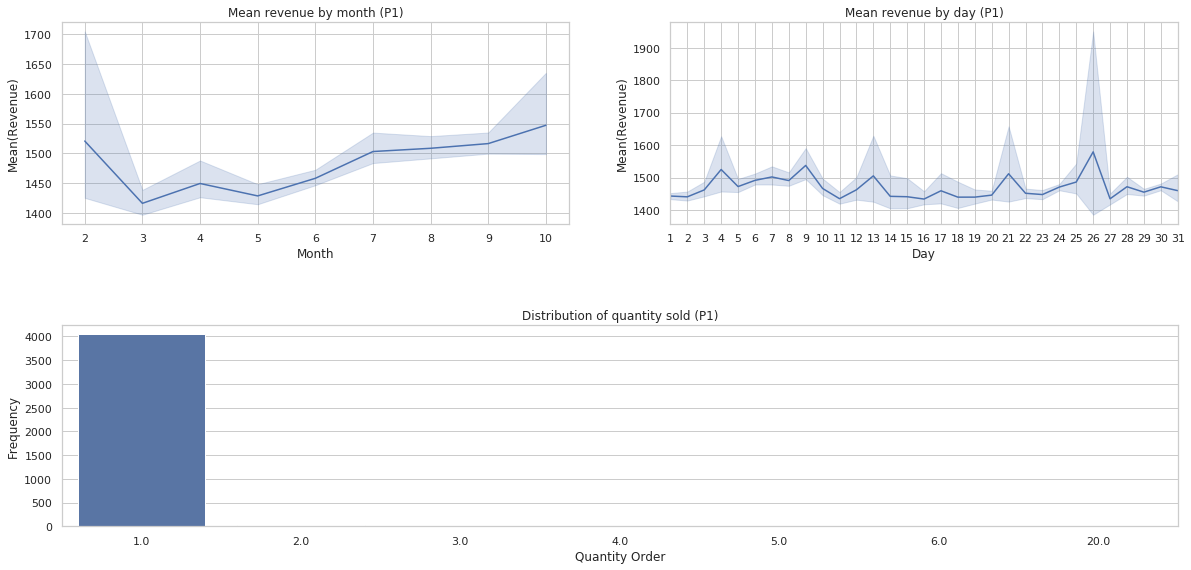

In [149]:
print('Mean of revenue by month of P1:')
print(df_sales_p1.groupby('MONTH')['REVENUE'].mean())

print('')

print('Distribution of quantity sold (P1):')
print(
    round((df_sales_p1.groupby('QTY_ORDER')['PROD_ID'].count() / df_sales_p1.QTY_ORDER.count()) * 100, 2).sort_values(ascending=False)
)

plt.figure(figsize=(20, 8))

plt.subplots_adjust(hspace=0.5, top=1)

plt.subplot(221)
sns.lineplot(x='MONTH', y='REVENUE', data=df_sales_p1)

plt.title('Mean revenue by month (P1)')
plt.xlabel('Month')
plt.ylabel('Mean(Revenue)')

plt.subplot(222)
sns.lineplot(x='DAY', y='REVENUE', data=df_sales_p1)

x = (np.arange(df_sales_p1.DAY.max()) + 1).astype(str)

plt.title('Mean revenue by day (P1)')
plt.xlabel('Day')
plt.ylabel('Mean(Revenue)')

plt.xlim((1, df_sales_p1.DAY.max()))
plt.xticks(np.arange(df_sales_p1.DAY.max())+1, x)

plt.subplot(212)

sns.countplot(df_sales_p1['QTY_ORDER'])

plt.title('Distribution of quantity sold (P1)')
plt.xlabel('Quantity Order')
plt.ylabel('Frequency')

plt.show()

**Mean revenue by month (P1)**
- Podemos observar uma queda na média das vendas a partir do mês de fevereiro e um crescimento a partir do mês de março.

**Mean revenue by day (P1)**
- Ao analisarmos o gráfico da média de receita por dia, vemos um pico na receita no final do mês.

**Distribution of quantity sold (P1)**
- Na análise da distribuição da quantidade vendida, podemos observar que 99% das vendas do produto P1 os clientes compram apenas 1 unidade.

### 4. P2

In [33]:
df_sales_p2 = df_sales[df_sales['PROD_ID'] == 'P2']
df_sales_p2.head()

,PROD_ID,QTY_ORDER,REVENUE,YEAR,MONTH,DAY,WEEKDAY,VL_UNIT
DATE_ORDER,,,,,,,,
2015-06-23,P2,1.0,649.00,2015,6,23,1,649.00
2015-07-29,P2,1.0,664.05,2015,7,29,2,664.05
2015-07-31,P2,1.0,664.05,2015,7,31,4,664.05
2015-07-31,P2,1.0,664.05,2015,7,31,4,664.05
2015-09-04,P2,1.0,658.99,2015,9,4,4,658.99


Mean of revenue by month of P2:
MONTH
1     820.525198
2     844.312378
3     762.758016
4     740.671408
5     727.805914
6     693.652694
7     703.782516
8     704.967048
9     655.173843
10    732.243451
Name: REVENUE, dtype: float64

Distribution of quantity sold (P2):
QTY_ORDER
1.0     96.1489
2.0      2.8268
3.0      0.3646
5.0      0.3251
6.0      0.1420
4.0      0.1310
10.0     0.0237
20.0     0.0079
50.0     0.0063
15.0     0.0032
8.0      0.0032
7.0      0.0032
40.0     0.0032
16.0     0.0016
12.0     0.0016
43.0     0.0016
9.0      0.0016
17.0     0.0016
27.0     0.0016
35.0     0.0016
Name: PROD_ID, dtype: float64


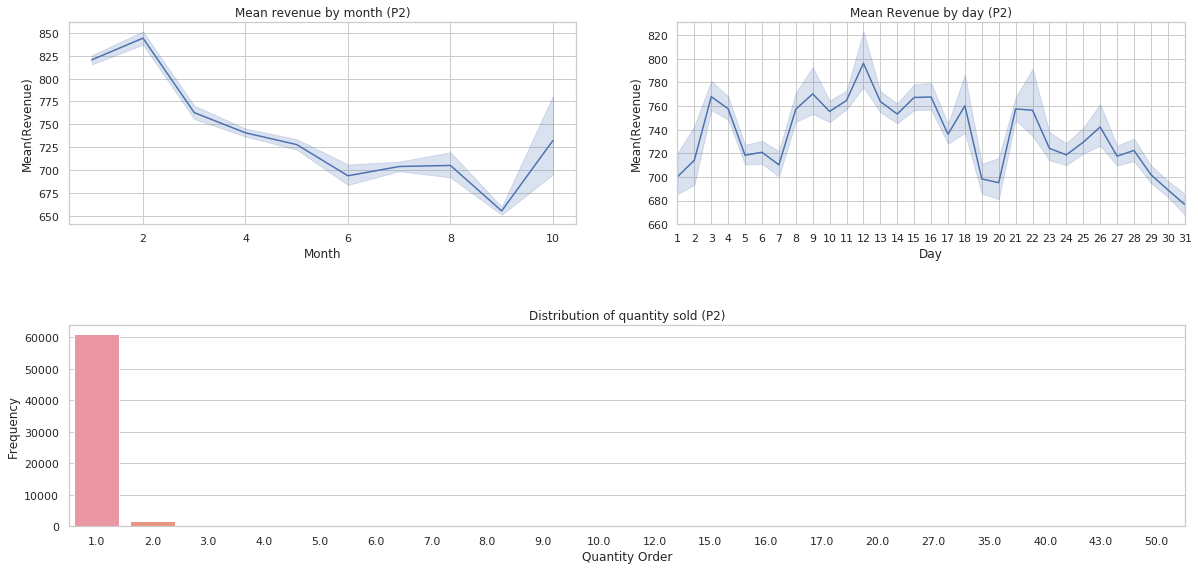

In [151]:
print('Mean of revenue by month of P2:')
print(df_sales_p2.groupby('MONTH')['REVENUE'].mean())

print('')

print('Distribution of quantity sold (P2):')
print(
    round((df_sales_p2.groupby('QTY_ORDER')['PROD_ID'].count() / df_sales_p2.QTY_ORDER.count()) * 100, 4).sort_values(ascending=False)
)

plt.figure(figsize=(20, 8))

plt.subplots_adjust(hspace=0.5, top=1)

plt.subplot(221)
sns.lineplot(x='MONTH', y='REVENUE', data=df_sales_p2)

plt.title('Mean revenue by month (P2)')
plt.xlabel('Month')
plt.ylabel('Mean(Revenue)')

plt.subplot(222)
sns.lineplot(x='DAY', y='REVENUE', data=df_sales_p2)

x = (np.arange(df_sales_p2.DAY.max()) + 1).astype(str)

plt.title('Mean Revenue by day (P2)')
plt.xlabel('Day')
plt.ylabel('Mean(Revenue)')

plt.xlim((1, df_sales_p2.DAY.max()))
plt.xticks(np.arange(df_sales_p2.DAY.max())+1, x)

plt.subplot(212)

sns.countplot(df_sales_p2['QTY_ORDER'])

plt.title('Distribution of quantity sold (P2)')
plt.xlabel('Quantity Order')
plt.ylabel('Frequency')

plt.show()

**Mean revenue by month (P2)**
- Podemos observar um aumento na média das vendas do produto P2 no mês de janeiro e após isso um decréscimo nas vendas até o mês 9.

**Mean revenue by day (P2)**
- As maiores vendas realizadas para o produto P2 são entre os dias 8 e 16.

**Distribution of quantity sold (P2)**
- 96% dos clientes compram apenas 1 unidade do produto P2.

### 5. P3

In [35]:
df_sales_p3 = df_sales[df_sales['PROD_ID'] == 'P3']
df_sales_p3.head()

,PROD_ID,QTY_ORDER,REVENUE,YEAR,MONTH,DAY,WEEKDAY,VL_UNIT
DATE_ORDER,,,,,,,,
2015-07-31,P3,1.0,1049.0,2015,7,31,4,1049.0
2015-07-31,P3,1.0,1049.0,2015,7,31,4,1049.0
2015-08-02,P3,1.0,1098.0,2015,8,2,6,1098.0
2015-07-21,P3,1.0,1098.0,2015,7,21,1,1098.0
2015-07-25,P3,1.0,1149.0,2015,7,25,5,1149.0


Mean of revenue by month of P3:
MONTH
2     1481.733649
3     1422.953703
4     1325.018529
5     1311.132542
6     1261.643387
7     1140.176967
8     1204.285600
9     1253.644096
10    1196.764821
Name: REVENUE, dtype: float64

Distribution of quantity sold (P3):
QTY_ORDER
1.0    98.5857
2.0     1.2763
3.0     0.0690
6.0     0.0345
5.0     0.0345
Name: PROD_ID, dtype: float64


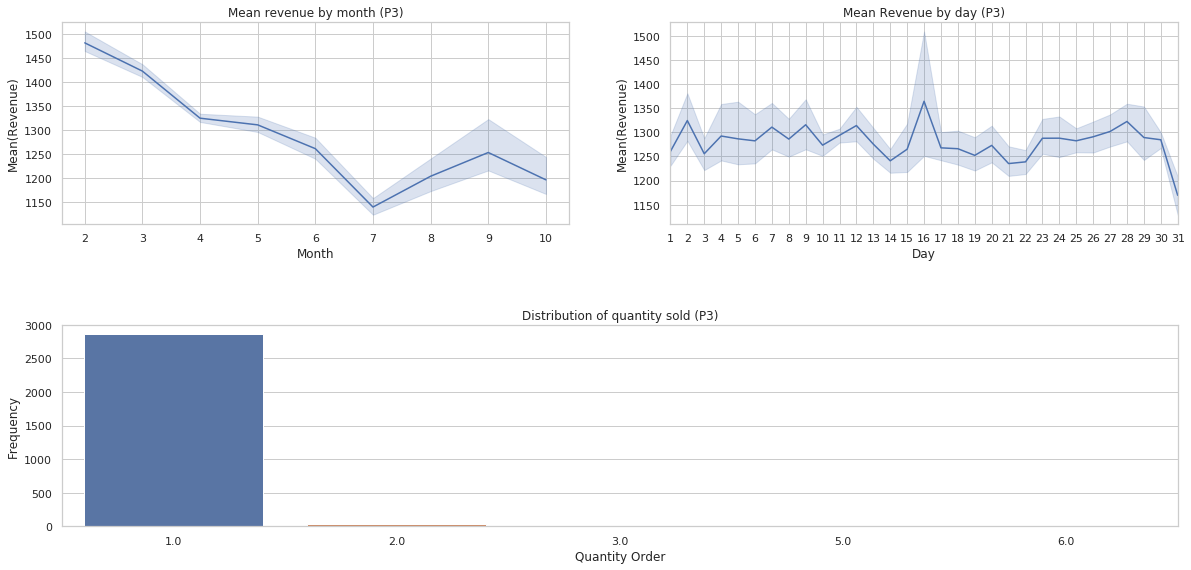

In [160]:
print('Mean of revenue by month of P3:')
print(df_sales_p3.groupby('MONTH')['REVENUE'].mean())

print('')

print('Distribution of quantity sold (P3):')
print(
    round((df_sales_p3.groupby('QTY_ORDER')['PROD_ID'].count() / df_sales_p3.QTY_ORDER.count()) * 100, 4).sort_values(ascending=False)
)

plt.figure(figsize=(20, 8))

plt.subplots_adjust(hspace=0.5, top=1)

plt.subplot(221)
sns.lineplot(x='MONTH', y='REVENUE', palette='tab10', data=df_sales_p3)

plt.title('Mean revenue by month (P3)')
plt.xlabel('Month')
plt.ylabel('Mean(Revenue)')

plt.subplot(222)
sns.lineplot(x='DAY', y='REVENUE', data=df_sales_p3)

x = (np.arange(df_sales_p3.DAY.max()) + 1).astype(str)

plt.title('Mean revenue by day (P3)')
plt.xlabel('Day')
plt.ylabel('Mean(Revenue)')

plt.xlim((1, df_sales_p3.DAY.max()))
plt.xticks(np.arange(df_sales_p3.DAY.max())+1, x)

plt.subplot(212)
sns.countplot(df_sales_p3['QTY_ORDER'])

plt.title('Distribution of quantity sold (P3)')
plt.xlabel('Quantity Order')
plt.ylabel('Frequency')

plt.show()

**Mean revenue by month (P3)**
- As vendas do produto P3 vêm decrescendo de fevereiro até o mês julho e tem um aumento até o mês de setembro.

**Mean revenue by day (P3)**
- A média das vendas por dia tem leves variações tanto de aumento quanto de diminuição no valor médio.

**Distribution of quantity sold (P3)**
- 98% dos clientes compram apenas 1 unidade do produto P3

### 6. P4

In [37]:
df_sales_p4 = df_sales[df_sales['PROD_ID'] == 'P4']
df_sales_p4.head()

,PROD_ID,QTY_ORDER,REVENUE,YEAR,MONTH,DAY,WEEKDAY,VL_UNIT
DATE_ORDER,,,,,,,,
2015-07-25,P4,1.0,540.55,2015,7,25,5,540.55
2015-08-26,P4,1.0,499.90,2015,8,26,2,499.90
2015-08-05,P4,1.0,569.00,2015,8,5,2,569.00
2015-07-26,P4,1.0,689.99,2015,7,26,6,689.99
2015-07-26,P4,1.0,689.90,2015,7,26,6,689.90


Mean of revenue by month of P4:
MONTH
3     565.120455
4     596.379187
5     576.878154
6     541.487886
7     742.445659
8     578.312493
9     571.114716
10    528.596585
Name: REVENUE, dtype: float64

Distribution of quantity sold (P4):
QTY_ORDER
1.0      93.8387
2.0       4.3941
3.0       0.6482
5.0       0.4162
4.0       0.2456
6.0       0.2047
50.0      0.0614
10.0      0.0341
40.0      0.0136
9.0       0.0136
11.0      0.0136
100.0     0.0136
15.0      0.0136
12.0      0.0068
7.0       0.0068
109.0     0.0068
23.0      0.0068
24.0      0.0068
28.0      0.0068
29.0      0.0068
30.0      0.0068
31.0      0.0068
35.0      0.0068
71.0      0.0068
85.0      0.0068
20.0      0.0068
Name: PROD_ID, dtype: float64


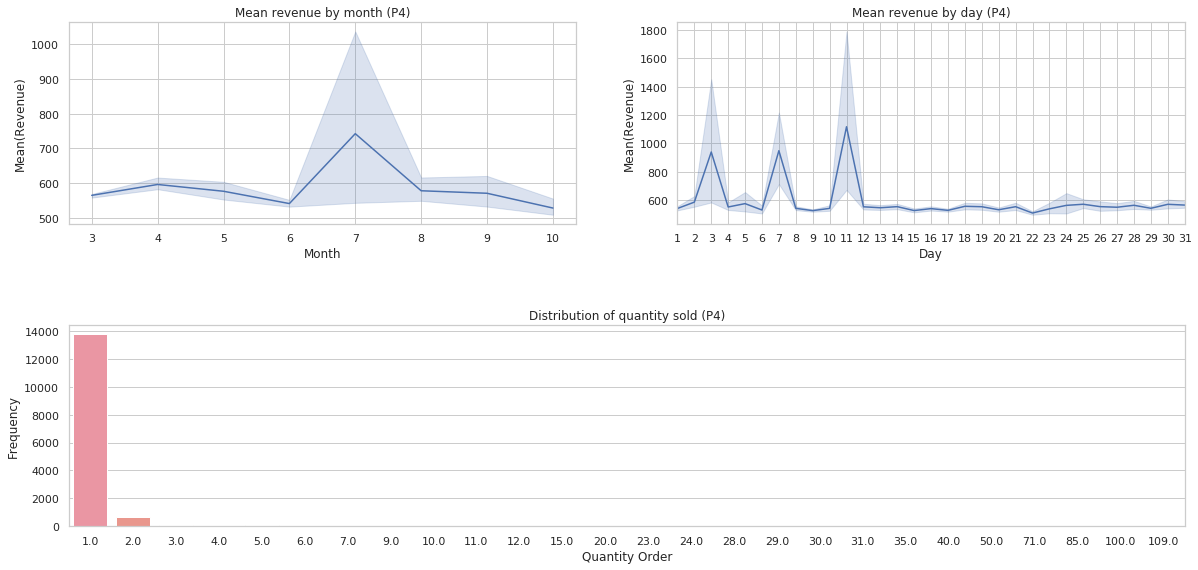

In [161]:
print('Mean of revenue by month of P4:')
print(df_sales_p4.groupby('MONTH')['REVENUE'].mean())

print('')

print('Distribution of quantity sold (P4):')
print(
    round((df_sales_p4.groupby('QTY_ORDER')['PROD_ID'].count() / df_sales_p4.QTY_ORDER.count()) * 100, 4).sort_values(ascending=False)
)

plt.figure(figsize=(20, 8))

plt.subplots_adjust(hspace=0.5, top=1)

plt.subplot(221)
sns.lineplot(x='MONTH', y='REVENUE', palette='tab10', data=df_sales_p4)

plt.title('Mean revenue by month (P4)')
plt.xlabel('Month')
plt.ylabel('Mean(Revenue)')

plt.subplot(222)
sns.lineplot(x='DAY', y='REVENUE', data=df_sales_p4)

x = (np.arange(df_sales_p4.DAY.max()) + 1).astype(str)

plt.title('Mean revenue by day (P4)')
plt.xlabel('Day')
plt.ylabel('Mean(Revenue)')

plt.xlim((1, df_sales_p4.DAY.max()))
plt.xticks(np.arange(df_sales_p4.DAY.max())+1, x)

plt.subplot(212)
sns.countplot(df_sales_p4['QTY_ORDER'])

plt.title('Distribution of quantity sold (P4)')
plt.xlabel('Quantity Order')
plt.ylabel('Frequency')

plt.show()

**Mean revenue by month (P3)**
- O produto 4 tem uma leve queda até o mês de junho, onde há pico nas vendas no mês de julho e novamente o seu valor médio volta ao normal (quase constante, tendo pouca variação).

**Mean revenue by day (P4)**
- As vendas diárias do produto 4 tem a sua variação quase constante, porém os dias 3, 7 e 11 tem um aumento significativo na média da receita. Podemos supor que na maior parte do mês este produto é comprado poucas vezes.

**Distribution of quantity sold (P4)**
- No gráfico da distribuição por quantidade vendida, podemos observar que 94% dos clientes compram apenas 1 unidade do produto 4 e 4.3% compram 2 unidades.

### 7. P5

In [39]:
df_sales_p5 = df_sales[df_sales['PROD_ID'] == 'P5']
df_sales_p5.head()

,PROD_ID,QTY_ORDER,REVENUE,YEAR,MONTH,DAY,WEEKDAY,VL_UNIT
DATE_ORDER,,,,,,,,
2015-07-25,P5,1.0,935.0,2015,7,25,5,935.0
2015-07-22,P5,1.0,799.0,2015,7,22,2,799.0
2015-07-21,P5,1.0,799.0,2015,7,21,1,799.0
2015-07-17,P5,1.0,749.0,2015,7,17,4,749.0
2015-07-21,P5,1.0,799.0,2015,7,21,1,799.0


Mean of revenue by month of P5:
MONTH
4     1049.150278
5      972.027883
6      851.169691
7      793.842416
8      805.947977
9      806.787946
10     792.149297
Name: REVENUE, dtype: float64

Distribution of quantity sold (P5):
QTY_ORDER
1.0     96.4046
2.0      2.6498
5.0      0.3540
3.0      0.2731
6.0      0.1871
4.0      0.1163
41.0     0.0051
39.0     0.0051
37.0     0.0051
Name: PROD_ID, dtype: float64


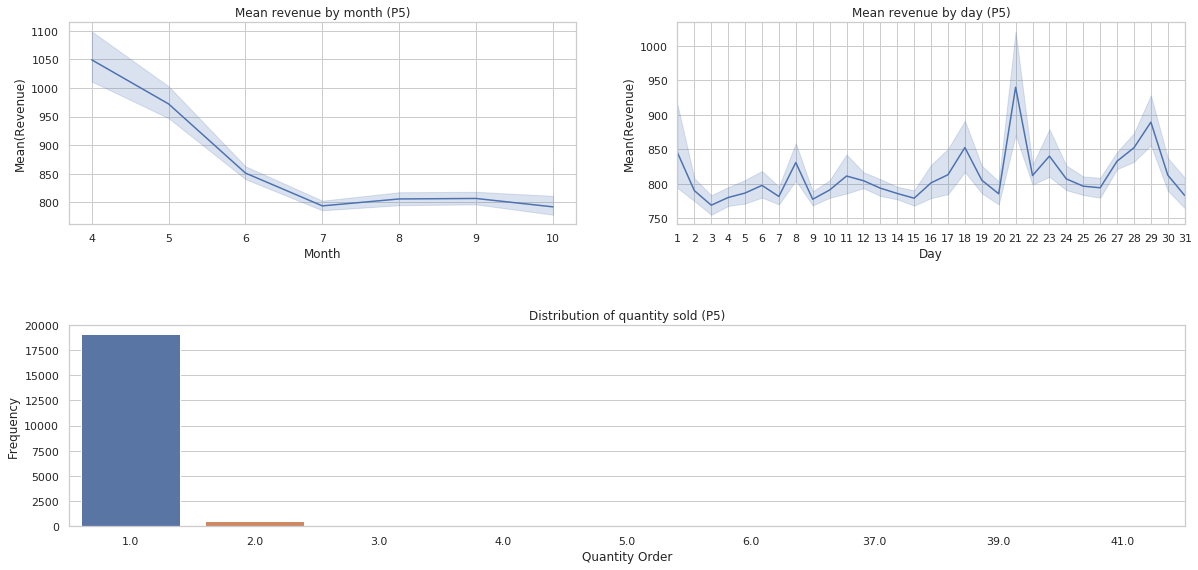

In [162]:
print('Mean of revenue by month of P5:')
print(df_sales_p5.groupby('MONTH')['REVENUE'].mean())

print('')

print('Distribution of quantity sold (P5):')
print(
    round((df_sales_p5.groupby('QTY_ORDER')['PROD_ID'].count() / df_sales_p5.QTY_ORDER.count()) * 100, 4).sort_values(ascending=False)
)

plt.figure(figsize=(20, 8))

plt.subplots_adjust(hspace=0.5, top=1)

plt.subplot(221)
sns.lineplot(x='MONTH', y='REVENUE', data=df_sales_p5)

plt.title('Mean revenue by month (P5)')
plt.xlabel('Month')
plt.ylabel('Mean(Revenue)')

plt.subplot(222)
sns.lineplot(x='DAY', y='REVENUE', data=df_sales_p5)

x = (np.arange(df_sales_p5.DAY.max()) + 1).astype(str)

plt.xlabel('Day')
plt.ylabel('Mean(Revenue)')

plt.title('Mean revenue by day (P5)')
plt.xlim((1, df_sales_p5.DAY.max()))
plt.xticks(np.arange(df_sales_p5.DAY.max())+1, x)

plt.subplot(212)
sns.countplot(df_sales_p5['QTY_ORDER'])

plt.title('Distribution of quantity sold (P5)')
plt.xlabel('Quantity Order')
plt.ylabel('Frequency')

plt.show()

**Mean revenue by month (P5)**
- Os produtos P5 tem uma média da receita alta apenas no mês de abril e vai decrescendo até o mês de julho, a partir deste mês até outubro os valores médio tem pouca alteração.

**Mean revenue by day (P5)**
- Podemos analisar que o produto 5 apesar de ter um decréscimo mensal no seu valor médio da receita, os seus valores médios diários existem bastante variações em entre dias pontuais.

**Distribution of quantity sold (P5)**
- Apesar dos seus valores diários um aumento em dias pontuais, 96% das vendas contém apenas 1 quantidade do produto 5.

### 8. P6

In [41]:
df_sales_p6 = df_sales[df_sales['PROD_ID'] == 'P6']
df_sales_p6.head()

,PROD_ID,QTY_ORDER,REVENUE,YEAR,MONTH,DAY,WEEKDAY,VL_UNIT
DATE_ORDER,,,,,,,,
2015-08-02,P6,1.0,1808.99,2015,8,2,6,1808.99
2015-08-17,P6,1.0,1674.00,2015,8,17,0,1674.00
2015-08-17,P6,1.0,1673.95,2015,8,17,0,1673.95
2015-08-11,P6,1.0,1674.00,2015,8,11,1,1674.00
2015-08-17,P6,1.0,1674.00,2015,8,17,0,1674.00


Mean of revenue by month of P6:
MONTH
1     1926.031531
2     1762.441349
3     1798.081012
4     1817.741821
5     1834.926325
6     1789.012278
7     1743.420364
8     1714.891307
9     1537.704835
10    1535.038660
Name: REVENUE, dtype: float64


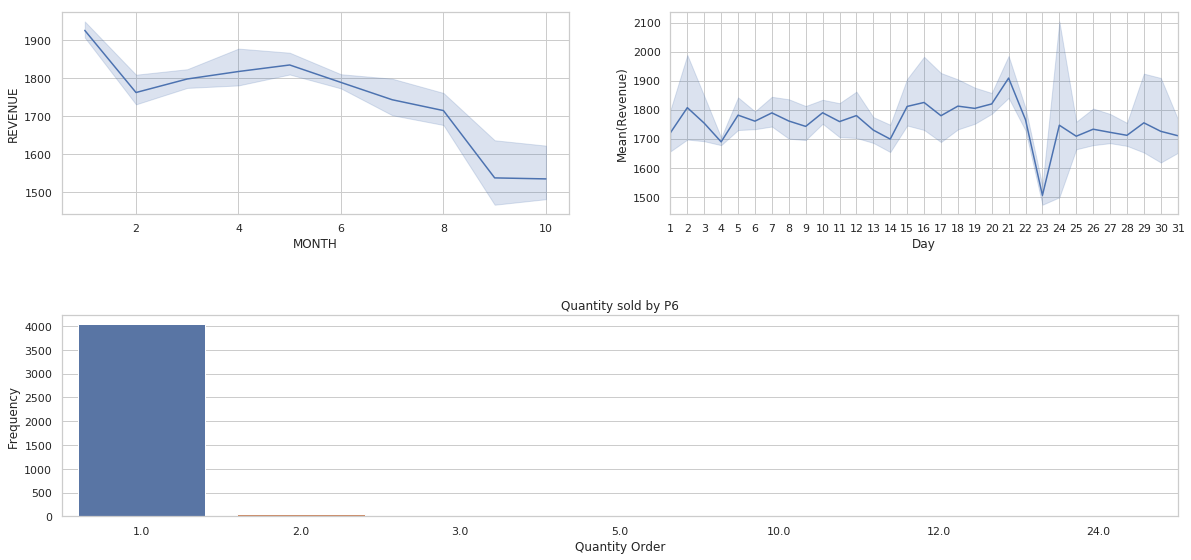

In [115]:
print('Mean of revenue by month of P6:')
print(df_sales_p6.groupby('MONTH')['REVENUE'].mean())

plt.figure(figsize=(20, 8))

plt.subplots_adjust(hspace=0.5, top=1)

plt.subplot(221)
sns.lineplot(x='MONTH', y='REVENUE', palette='tab10', data=df_sales_p6)

plt.subplot(222)
sns.lineplot(x='DAY', y='REVENUE', data=df_sales_p6)

x = (np.arange(df_sales_p6.DAY.max()) + 1).astype(str)

plt.xlabel('Day')
plt.ylabel('Mean(Revenue)')

plt.xlim((1, df_sales_p6.DAY.max()))
plt.xticks(np.arange(df_sales_p6.DAY.max())+1, x)

plt.subplot(212)
sns.countplot(df_sales_p6['QTY_ORDER'])

plt.title('Quantity sold by P6')
plt.xlabel('Quantity Order')
plt.ylabel('Frequency')

plt.show()

*Comments*

### 9. P7

In [43]:
df_sales_p7 = df_sales[df_sales['PROD_ID'] == 'P7']
df_sales_p7.head()

,PROD_ID,QTY_ORDER,REVENUE,YEAR,MONTH,DAY,WEEKDAY,VL_UNIT
DATE_ORDER,,,,,,,,
2015-07-31,P7,1.0,749.0,2015,7,31,4,749.0
2015-07-25,P7,1.0,749.0,2015,7,25,5,749.0
2015-08-02,P7,1.0,752.0,2015,8,2,6,752.0
2015-08-02,P7,1.0,752.0,2015,8,2,6,752.0
2015-07-17,P7,1.0,749.0,2015,7,17,4,749.0


Mean of revenue by month of P7:
MONTH
1     860.442439
2     874.765825
3     895.445514
4     872.802125
5     831.445669
6     822.977531
7     793.183142
8     762.346568
9     745.235600
10    765.480196
Name: REVENUE, dtype: float64


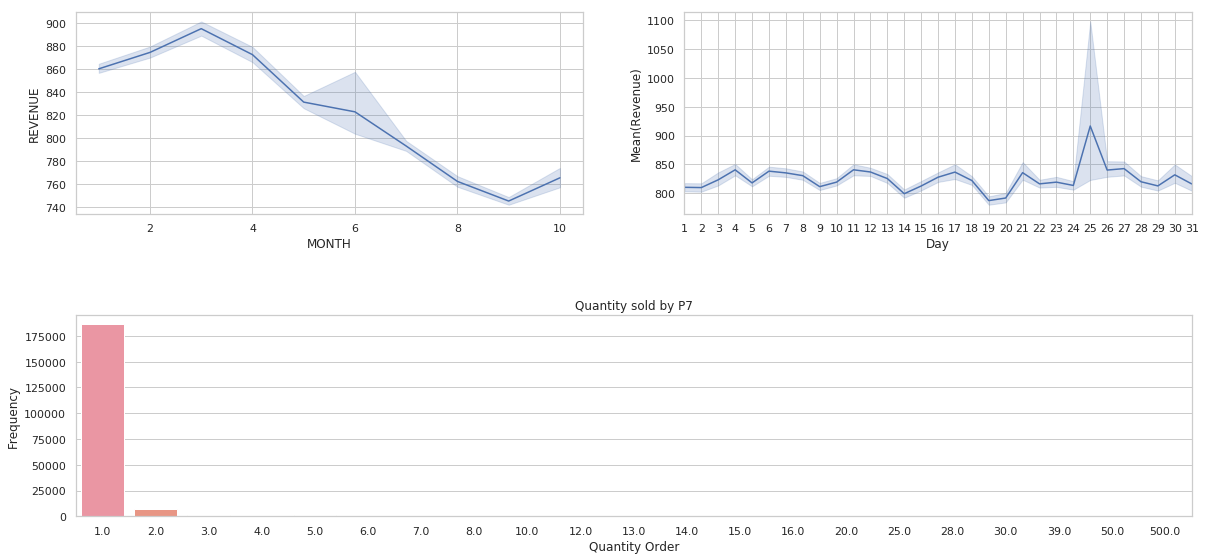

In [117]:
print('Mean of revenue by month of P7:')
print(df_sales_p7.groupby('MONTH')['REVENUE'].mean())

plt.figure(figsize=(20, 8))

plt.subplots_adjust(hspace=0.5, top=1)

plt.subplot(221)
sns.lineplot(x='MONTH', y='REVENUE', palette='tab10', data=df_sales_p7)

plt.subplot(222)
sns.lineplot(x='DAY', y='REVENUE', data=df_sales_p7)

x = (np.arange(df_sales_p7.DAY.max()) + 1).astype(str)

plt.xlabel('Day')
plt.ylabel('Mean(Revenue)')

plt.xlim((1, df_sales_p7.DAY.max()))
plt.xticks(np.arange(df_sales_p7.DAY.max())+1, x)

plt.subplot(212)
sns.countplot(df_sales_p7['QTY_ORDER'])

plt.title('Quantity sold by P7')
plt.xlabel('Quantity Order')
plt.ylabel('Frequency')

plt.show()

*Comments*

### 10. P8

In [45]:
df_sales_p8 = df_sales[df_sales['PROD_ID'] == 'P8']
df_sales_p8.head()

,PROD_ID,QTY_ORDER,REVENUE,YEAR,MONTH,DAY,WEEKDAY,VL_UNIT
DATE_ORDER,,,,,,,,
2015-07-28,P8,4.0,1604.00,2015,7,28,1,401.00
2015-07-30,P8,1.0,388.16,2015,7,30,3,388.16
2015-07-31,P8,1.0,388.16,2015,7,31,4,388.16
2015-07-29,P8,1.0,448.52,2015,7,29,2,448.52
2015-07-25,P8,1.0,439.00,2015,7,25,5,439.00


Mean of revenue by month of P8:
MONTH
3     585.456995
4     520.342590
5     471.454355
6     497.097016
7     472.126985
8     422.979394
9     411.469277
10    422.123493
Name: REVENUE, dtype: float64


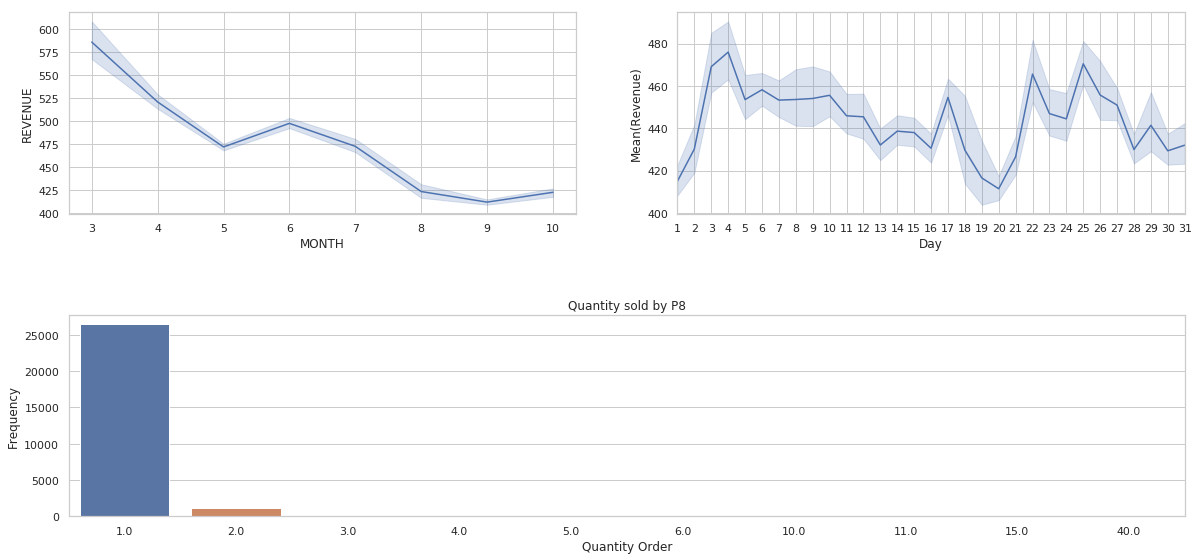

In [119]:
print('Mean of revenue by month of P8:')
print(df_sales_p8.groupby('MONTH')['REVENUE'].mean())

plt.figure(figsize=(20, 8))

plt.subplots_adjust(hspace=0.5, top=1)

plt.subplot(221)
sns.lineplot(x='MONTH', y='REVENUE', palette='tab10', data=df_sales_p8)

plt.subplot(222)
sns.lineplot(x='DAY', y='REVENUE', data=df_sales_p8)

x = (np.arange(df_sales_p8.DAY.max()) + 1).astype(str)

plt.xlabel('Day')
plt.ylabel('Mean(Revenue)')

plt.xlim((1, df_sales_p8.DAY.max()))
plt.xticks(np.arange(df_sales_p8.DAY.max())+1, x)

plt.subplot(212)
sns.countplot(df_sales_p8['QTY_ORDER'])

plt.title('Quantity sold by P8')
plt.xlabel('Quantity Order')
plt.ylabel('Frequency')

plt.show()

*Comments*

### 11. P9

In [48]:
df_sales_p9 = df_sales[df_sales['PROD_ID'] == 'P9']
df_sales_p9.head()

,PROD_ID,QTY_ORDER,REVENUE,YEAR,MONTH,DAY,WEEKDAY,VL_UNIT
DATE_ORDER,,,,,,,,
2015-09-24,P9,1.0,399.0,2015,9,24,3,399.0
2015-08-02,P9,1.0,435.0,2015,8,2,6,435.0
2015-07-25,P9,2.0,878.0,2015,7,25,5,439.0
2015-08-02,P9,1.0,435.0,2015,8,2,6,435.0
2015-08-02,P9,1.0,435.0,2015,8,2,6,435.0


Mean of revenue by month of P9:
MONTH
3     576.311304
4     505.706888
5     476.737577
6     527.673719
7     464.059598
8     426.722495
9     409.701574
10    416.695545
Name: REVENUE, dtype: float64


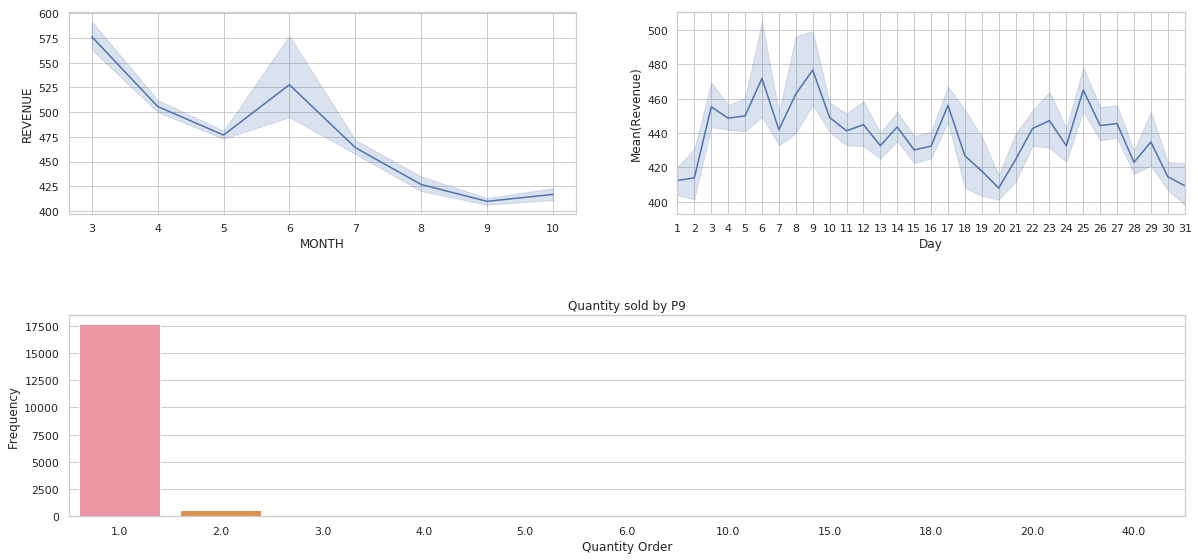

In [121]:
print('Mean of revenue by month of P9:')
print(df_sales_p9.groupby('MONTH')['REVENUE'].mean())

plt.figure(figsize=(20, 8))

plt.subplots_adjust(hspace=0.5, top=1)

plt.subplot(221)
sns.lineplot(x='MONTH', y='REVENUE', palette='tab10', data=df_sales_p9)

plt.subplot(222)
sns.lineplot(x='DAY', y='REVENUE', data=df_sales_p9)

x = (np.arange(df_sales_p9.DAY.max()) + 1).astype(str)

plt.xlabel('Day')
plt.ylabel('Mean(Revenue)')

plt.xlim((1, df_sales_p9.DAY.max()))
plt.xticks(np.arange(df_sales_p9.DAY.max())+1, x)

plt.subplot(212)
sns.countplot(df_sales_p9['QTY_ORDER'])

plt.title('Quantity sold by P9')
plt.xlabel('Quantity Order')
plt.ylabel('Frequency')

plt.show()

*Comments*

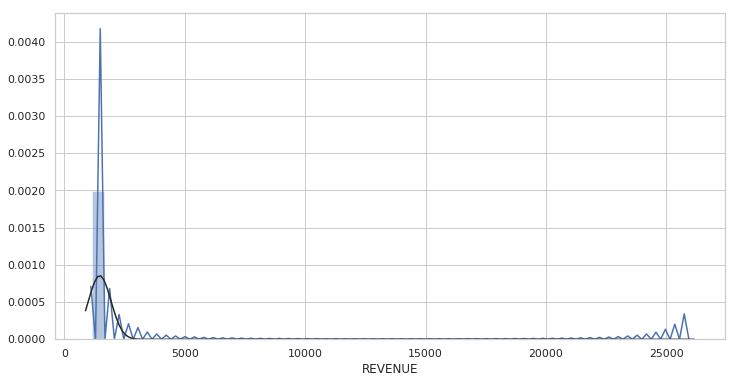

In [50]:
# Teste

from scipy.stats import norm, skew

plt.figure(figsize=(12, 6))

sns.distplot(df_sales_p1['REVENUE'], fit=norm)

plt.show()